##### Grading Feedback Cell

# Question 0 (-2 If not answered)
Please provide the following the data so we can verify your github information and ensure accurate grading:
- Your Name: Chaithra Kopparam Cheluvaiah
- Your SU ID: 326926205

# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@g.syr.edu>
- Faculty Assistants: 
  - Warren Justin Fernandes <wjfernan@syr.edu>
  - Ruchita Hiteshkumar Harsora <	rharsora@g.syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

In [1]:
%%bash
# Do not change or modify this cell
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already installed
pip install pyspark >& /dev/null 

# Download the data files from github
# If the data file does not exist in the colab environment
data_file_1=colleges_data_science_programs.csv

if [[ ! -f ./${data_file_1} ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/${data_file_1} >& /dev/null 
fi

In [2]:
#creating spark session and spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ist718-hw05-pca').getOrCreate()
sc = spark.sparkContext

In [3]:
# loading required libraries
import pyspark.sql.functions as f
from pyspark.ml import Pipeline, feature, clustering
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer, IDF
import requests
import pandas as pd
import numpy as np
from pyspark.sql import types
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn  as sns

%matplotlib inline

# Unsupervised learning

The colleges_data_science_programs dataset contains information about dozens of "data science" programs across the US.

## Question 1: (10 pts)

This dataset contains many columns that we can use to understand how these data science programs differ from one another.

## Question 1a (5 pts)
Read the colleges_data_science_programs.csv data file into a data frame named raw_ds_programs_text_df.

In [4]:
raw_ds_programs_text_df = spark.read.csv('colleges_data_science_programs.csv', header=True, inferSchema=True)

In [5]:
# Grading Cell Do not Modify
print("rows:", raw_ds_programs_text_df.count(), ", cols:", len(raw_ds_programs_text_df.columns))
display(raw_ds_programs_text_df.show(5))

rows: 222 , cols: 28
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+-------------------+-------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|         created_at|         updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+-------------------+-------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---

None

##### Grading Feedback Cell

## Question 1b (5 pts)
- Starting with `raw_ds_programs_text_df`, create a new dataframe named `ds_programs_text_df` which simply adds a column named `text` to the dataframe `raw_ds_programs_df`. 
- The `text` column will have the concatenation of the following columns separated by a space: `program`, `degree` and `department` (find the appropriate function in the `fn` package). <br>

An example of the `ds_programs_text_df` should give you:

```python
ds_programs_text_df.orderBy('id').first().text
```

```console
'Data Science Masters Mathematics and Statistics'
```

In [6]:
ds_programs_text_df = raw_ds_programs_text_df.withColumn('text', f.concat_ws(' ', f.col('program'), f.col('degree'), f.col('department')))
ds_programs_text_df.orderBy('id').first().text

'Data Science Masters Mathematics and Statistics'

In [7]:
# Grading Cell Do Not Modify
display(ds_programs_text_df.show(5))
display(ds_programs_text_df.select('text').show(5, truncate=False))

+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+-------------------+-------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+--------------------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|         created_at|         updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|                text|
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+-------------------+-------------------+----------------+------------+-------+----------+------------+-----+----+-------------+--------

None

+------------------------------------------------------------------+
|text                                                              |
+------------------------------------------------------------------+
|Data Science Masters Mathematics and Statistics                   |
|Analytics Masters Business and Information Systems                |
|Data Science Masters Computer Science                             |
|Business Intelligence & Analytics Masters Business                |
|Advanced Computer Science(Data Analytics) Masters Computer Science|
+------------------------------------------------------------------+
only showing top 5 rows



None

##### Grading Feedback Cell

# Question 2: (10 pts) 

## Question 2a (5 pts)
- Create a pipeline named `pipe_features` that creates a new dataframe `ds_features_df`.  The pipe_features pipeline adds a column `features` to `ds_programs_text_df` that contains the `tfidf` of the `text` column.  
- Make sure to create your pipeline using the natural language processing pipeline methodology as outlined in class and demonstrated in the in class notebooks.  

In [8]:
# obtaining the stop words
STOP_WORDS = requests.get('https://raw.githubusercontent.com/wewilli1/ist718_data/master/stop_words.txt').text.split()


# Assembling all the stages - Tokenizer, Stop word removal, TF, and IDF
pipe_features = Pipeline(stages=[feature.RegexTokenizer(minTokenLength=2, gaps=False, pattern='\\p{L}+', inputCol = 'text', outputCol='tokens'), 
                                 feature.StopWordsRemover(stopWords=STOP_WORDS, caseSensitive=False, inputCol='tokens', outputCol='filtered'),
                                 feature.CountVectorizer(inputCol='filtered', outputCol='tf'), 
                                 feature.IDF(inputCol='tf', outputCol='features')])

feature_engineering_pipe = pipe_features.fit(ds_programs_text_df)
ds_features_df = feature_engineering_pipe.transform(ds_programs_text_df)

In [9]:
# Grading Cell Do Not Modify
display(ds_features_df.show(5))
display(ds_features_df.select("features").show(5, truncate=False))

+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+-------------------+-------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|         created_at|         updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|                text|              tokens|            filtered|                  tf|            features|
+---+--------------------+--------------------+--------------------+-------+-------+-----+----

None

+-------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------+
|(98,[0,1,4,6,30],[0.2538801769623398,0.6622396430968687,1.2800373864150272,2.411439497906128,3.615412302232064])                     |
|(98,[0,2,3,8,22],[0.2538801769623398,1.0377239189930973,0.8120519213255288,2.411439497906128,3.009276498661748])                     |
|(98,[0,1,4,7],[0.2538801769623398,0.6622396430968687,2.5600747728300544,2.411439497906128])                                          |
|(98,[0,2,3,9],[0.2538801769623398,2.0754478379861947,0.8120519213255288,2.316129318101803])                                          |
|(98,[0,1,3,4,7,37],[0.2538801769623398,0.662239

None

##### Grading Feedback Cell

## Question 2b (5 pts)
- Create a pipeline model `pipe_pca` that computes the first two principal components of the `features` column as computed by `pipe_features` and creates a new column named `scores`. 
- Use `pipe_pca` to create a dataframe `ds_features_df1` with the columns `id`, `name`, `url`, and `scores`.

In [10]:
pipe_pca = Pipeline(stages=[feature.StandardScaler(withMean=True, withStd=False, inputCol='features', outputCol='centered_tfidf'),
                            feature.PCA(k=2,inputCol='centered_tfidf', outputCol='scores')])
pca_fitted = pipe_pca.fit(ds_features_df)
ds_features_df1 = pca_fitted.transform(ds_features_df)
ds_features_df1 = ds_features_df1.select('id', 'name', 'url', 'scores')

In [11]:
# Grading Cell Do Not Modify
ds_features_df1.show(5, truncate=False)

+---+-----------------------------+--------------------------------------------------------------------------------------------+-----------------------------------------+
|id |name                         |url                                                                                         |scores                                   |
+---+-----------------------------+--------------------------------------------------------------------------------------------+-----------------------------------------+
|1  |South Dakota State University|http://www.sdstate.edu/mathstat/grad/masters-in-data-science.cfm                            |[-0.25965124952687063,0.6470568437819622]|
|2  |Dakota State University      |http://www.dsu.edu/msa/                                                                     |[-0.3575763812422191,-0.3201736586119971]|
|3  |Lewis University             |http://www.lewisu.edu/academics/data-science/index.htm                                      |[0.29002687479639

##### Grading Feedback Cell

# Question 3: (20 pts)
In this question you will write code that makes recommendations on programs closest to a program of interest.  
- Create a function named `get_nearest_programs` that returns the 3 closest programs to a program of interest.  
- The `get_nearest_programs` function shall take 1 argument: `program_of_interest`.  
- The `get_nearest_programs` function shall return the 3 programs (as defined by the `name` column) closest to the program argument as defined by L2 Euclidian distance.  Do not return the program of interest argument as one of the names.  
- We are expecting you to use the in class recommender system case study for a reference as how to implement.  Use the pipeline and resulting scores column from the previous question as a starting point.

In [12]:
def euclidean_dist(vector1, vector2):    
    return float(np.sqrt((vector1 - vector2).T.dot((vector1 - vector2))))

l2_dist_udf = f.udf(euclidean_dist, types.FloatType())

In [13]:
def get_nearest_programs(school_name:str):
  school_df = ds_features_df1.filter(f.col('name')==school_name).select(f.col('scores').alias('prgm_interest'))
  recommended_schools = school_df.join(ds_features_df1).\
                        withColumn('dist', l2_dist_udf('scores','prgm_interest')).\
                        select('name','dist').filter(f.col('dist')!=0).\
                        orderBy(f.asc('dist')).limit(3)
  return recommended_schools.toPandas()

In [14]:
# Grading Cell Do Not Modify
get_nearest_programs('Harvard University') # Of course I removed Yale from the dataset :)

,name,dist
0,Coventry University,0.525894
1,University College London,0.659988
2,Utrecht University,0.700097


##### Grading Feedback Cell

# Question 4 (10 pts)

- Create two Pandas dataframes `pc1_pd` and `pc2_pd` with the columns `word` and `abs_loading` that contain the top 5 sorted  absolute values of loadings for the purposes of feature selection.  
- Provide an interpretation of the loadings based on information provided in lecture taking into account covariance or correlation.

In [15]:
pca_model = pca_fitted.stages[-1]
pc1_scores_abs = np.absolute(pca_model.pc.toArray()[:,0])
pc2_scores_abs = np.absolute(pca_model.pc.toArray()[:,1])

vocaubulary = feature_engineering_pipe.stages[2].vocabulary

In [16]:
pc1_pd = pd.DataFrame([vocaubulary, pc1_scores_abs]).T.rename(columns={0:'word',1:'abs_loading'})
pc1_pd = pc1_pd.sort_values('abs_loading', ascending=False).head(5)


pc2_pd = pd.DataFrame([vocaubulary, pc2_scores_abs]).T.rename(columns={0:'word',1:'abs_loading'})
pc2_pd = pc2_pd.sort_values('abs_loading', ascending=False).head(5)

In [17]:
# Grading cell do not modify
display(pc1_pd.head())
display(pc2_pd.head())

,word,abs_loading
18,computational,0.57183
15,sciences,0.496999
35,physics,0.302357
36,astronomy,0.302357
21,school,0.275959


,word,abs_loading
4,science,0.551568
7,computer,0.55096
28,college,0.297113
2,business,0.232658
18,computational,0.169557


##### Grading Feedback Cell

Your interpretation here (5 pts): 

* Because the data (TF-IDF values) are all in the same units, it would be sufficient to just center the data without any strandardization. So, the loading vector coefficients can be said to represent the covariance of the variables (words in the vocabulary).

* `pc1_pd` captures the loading vector coefficients of the first principal component. First PC represents maximum variance in the data. The table above lists top 5 tokens that has highest covariance (or) largest influence in determining the First PC.

* The tokens `computational, sciences, physics, astronomy, school` are listed under `pc1_pd`. These tokens will have higher influence in determining the first principal component. The tf-idf values for these tokens could be higher, in my opinion, because they don't seem to appear quiet frequently in the corpus, hence having higher effect on the first PCA score.

* `pc2_pd` captures the loading vector coefficients of the second principal component. Second PC represents second highest variance in the data (what is left after the first PCA) and it would be orthogonal to first PC. The table above lists top 5 tokens that has largest influence in determining the second PC.




##### Grading Feedback Cell

# Question 5: (10 pts)

- Create a new pipeline called pipe_pca1 where you fit the maximum possible number of principal components for this dataset. 
- Create a scree plot and a plot of cumulative variance explained (exactly 2 plots).  
- Describe 2 things.  Fist, tell us how many principal components you were able to create (the maximum number).  Second, based on either the scree or cumulative variance explained, describe how many principal components you would use if you were building a supervised machine learning model.  Use bullets in the markdown cell to separate your 2 answers.

In [18]:
num_rows = ds_features_df.count()
num_predictors = len(feature_engineering_pipe.stages[2].vocabulary)
max_components = min([(num_rows-1), num_predictors])
print('Maximum number of components:', max_components)

pipe_pca1 = Pipeline(stages=[feature.StandardScaler(withMean=True, withStd=False, inputCol='features', outputCol='centered_tfidf'),
                             feature.PCA(k=max_components, inputCol='centered_tfidf', outputCol='scores')]).fit(ds_features_df)

Maximum number of components: 98


In [19]:
explained_var = pipe_pca1.stages[-1].explainedVariance
cum_sum = np.cumsum(explained_var)

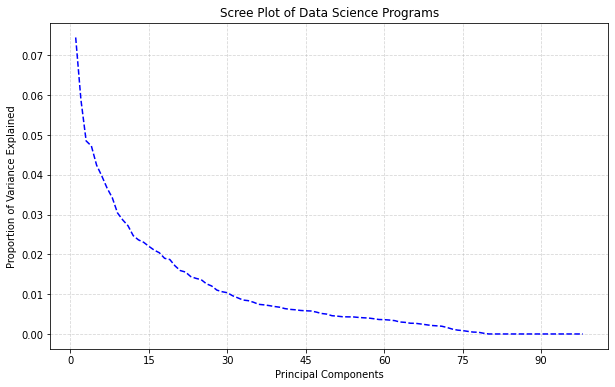

In [20]:
plt.figure(figsize=(10,6))
plt.title('Scree Plot of Data Science Programs')
plt.plot(np.arange(1, len(explained_var)+1), explained_var, color='blue', linestyle='--')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(np.arange(0, len(explained_var)+1, 15))
plt.show()

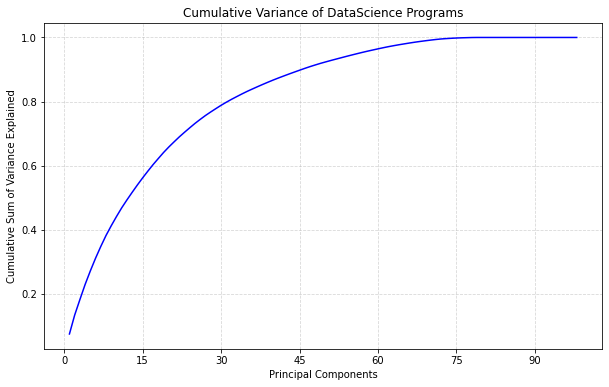

In [21]:
plt.figure(figsize=(10,6))
plt.title('Cumulative Variance of DataScience Programs')
plt.plot(np.arange(1, len(explained_var)+1), cum_sum, color='blue')
plt.grid(True, alpha=0.5, linestyle='dashed')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Sum of Variance Explained")
plt.xticks(np.arange(0, len(explained_var)+1, 15))
plt.show()

##### Grading Feedback Cell

Your 2 explanations here

* Using the following formula, I was able to generate 98 principal components:

  $ max\_comps = min(n - 1, p) $

  where, $n:$ number of rows in the data (222 rows in the given dataset)

  $p:$ number of predictors (98 words in the vocabulary)

  $ max\_comps = min(221, 98) $

  Therefore, $ max\_comps = 98 $

* The elbow (cutting-off point) of the scree plot flattens between the principal components 15 and 30. The cumulative variance plot also reveals that the principle components 1 to 30 will account for 80% of the variance in the data. Therefore, PC1-PC30 would be sufficient to describe the original data and could also be used as predictors for the supervised ML model.

##### Grading Feedback Cell

# Question 6: (20 pts)
- Create a pipeline named pipe_pca2 that computes PCA scores for the first 2 principal components.  Add a kmeans object to pipe_pca2 and compute kmeans with k = 5.  
- Create a scatter plot which displays PC2 scores (y-axis) vs. PC1 scores (x-axis) where each point is colored by the cluster assignment.  Include a plot legend.  
- Look for interesting patterns in the clusters and label the points to learn something surprising or interesting about the data set.  One example of what I am looking for is in the case study notebook which has a plot that shows IST-718 is very close to IST-719 - and IST-718 / IST-718 is far away from other courses. You are free to explore as you see fit.  Essentially we are looking for you to find an interesting pattern within the clusters and label the points such that you learn something about the data set.  
- Describe what surprising or interesting fact you learned.  Your plot should be easy to read and labels should not be so dense that they are hard to read / on top of each other.
- The recommender notebook uses a normalizer object to produce the IST-718 / IST-718 plot mentioned above.  The normalizer has the effect of scaling each data observation into a unit vector.  This may or may not be useful to improve your visualization - you will have to try it and see if it helps.  ONLY use the normalizer for visualizations in this assignment.  We do not expect the normalizer to be included in any pipeline except if it is being used for visualization purposes.

In [22]:
# building PCA and K-Means clustering model
NUM_CLUSTERS=5
NUM_COMPONENTS = 2

pipe_pca2 = Pipeline(stages=[feature.StandardScaler(withMean=True, withStd=False, inputCol='features', outputCol='centered_tfidf'),
                             feature.PCA(k=NUM_COMPONENTS, inputCol='centered_tfidf', outputCol='scores'),
                             clustering.KMeans(k=NUM_CLUSTERS, featuresCol='scores', predictionCol='kmeans_feat', seed=3157280657)])

pca_kmeans_model = pipe_pca2.fit(ds_features_df)
pca_kmeans_preds = pca_kmeans_model.transform(ds_features_df)

In [23]:
# plotting the clusters and PCA scores
pca1 = np.array(pca_kmeans_preds.select('scores').rdd.map(lambda pca: pca['scores'][0]).collect())
pca2 = np.array(pca_kmeans_preds.select('scores').rdd.map(lambda pca: pca['scores'][1]).collect())
kmeans_feat =  np.array(pca_kmeans_preds.select('kmeans_feat').rdd.map(lambda kmeans: kmeans['kmeans_feat']).collect())
school_name =  np.array(pca_kmeans_preds.select('name').rdd.map(lambda df: df['name']).collect())
dept_names =  np.array(pca_kmeans_preds.select('department').rdd.map(lambda df: df['department']).collect())
program_names =  np.array(pca_kmeans_preds.select('program').rdd.map(lambda df: df['program']).collect())

# pandas df to plot the PCA
pred_pd = pd.DataFrame({'PCA1':pca1, 'PCA2':pca2, 'SchoolName':school_name, 'Program':program_names,'Dept':dept_names, 'KMeans':kmeans_feat})

In [24]:
pred_pd['centeroid_x'] = pred_pd['KMeans'].apply(lambda cluster: pca_kmeans_model.stages[-1].clusterCenters()[cluster][0])
pred_pd['centeroid_y'] = pred_pd['KMeans'].apply(lambda cluster: pca_kmeans_model.stages[-1].clusterCenters()[cluster][1])
pred_pd['euclidean_dist'] = np.linalg.norm(pred_pd.loc[:, ['PCA1','PCA2']].values - pred_pd.loc[:, ['centeroid_x','centeroid_y']], axis=1)

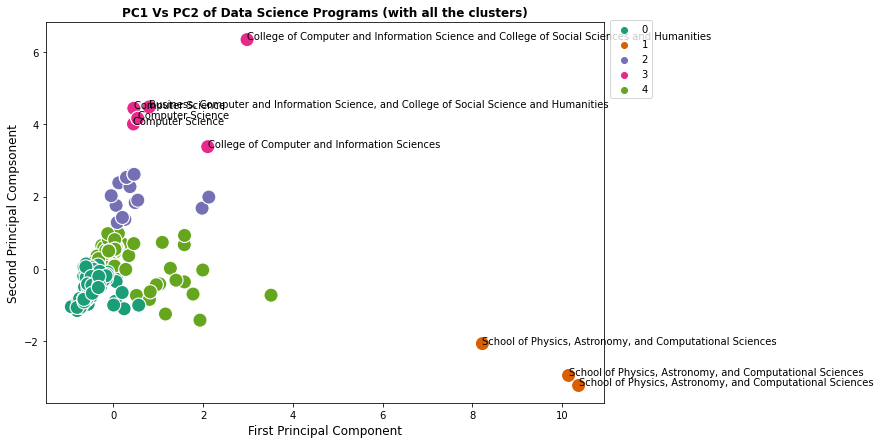

In [25]:
plt.figure(figsize=(10,7))
plt.title('PC1 Vs PC2 of Data Science Programs (with all the clusters)', fontsize=12, fontweight='bold' )
ax = sns.scatterplot(data=pred_pd, x='PCA1', y='PCA2', s=200, hue='KMeans', palette='Dark2')
plt.xlabel('First Principal Component',fontsize=12)
plt.ylabel('Second Principal Compsonent',fontsize=12)
plt.legend(loc=(1.01,0.8))

# annotating only few clusters with department names
filtered_labels = pred_pd[pred_pd['KMeans'].isin([1,3])]
for index,row in filtered_labels.iterrows():
  ax.annotate(row['Dept'], (row['PCA1'], row['PCA2']))
plt.show()

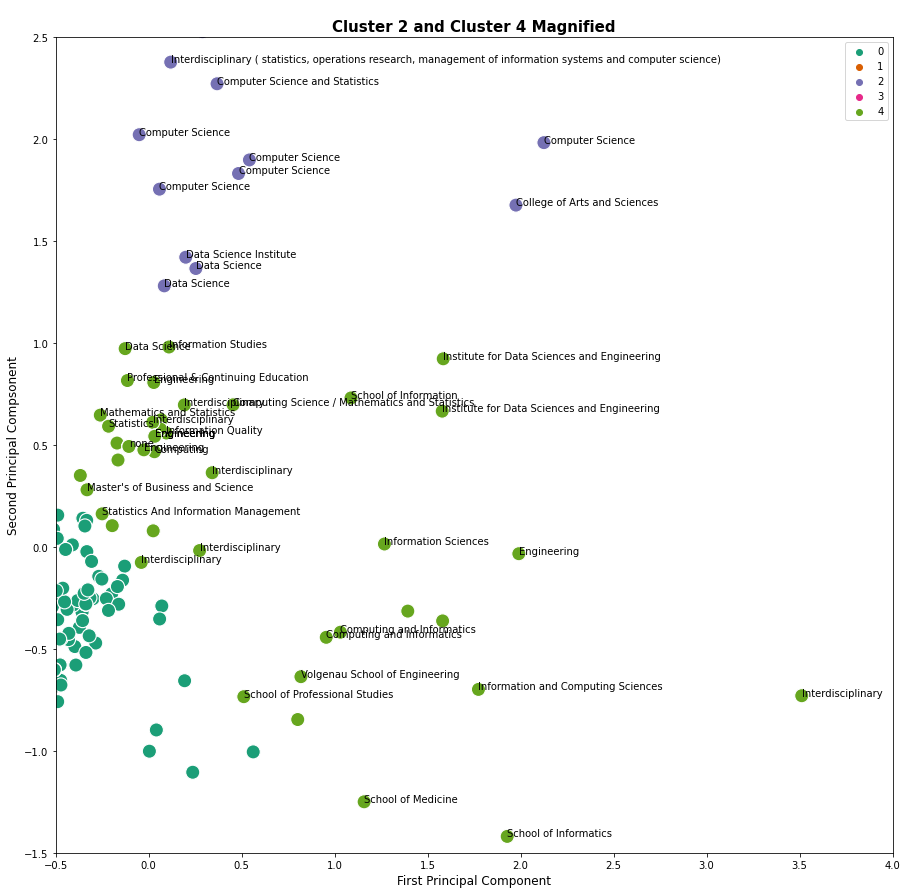

In [26]:
# zooming in on cluster 2 and cluster 4
plt.figure(figsize=(15,15))
plt.title('Cluster 2 and Cluster 4 Magnified', fontsize=15, fontweight='bold' )
ax = sns.scatterplot(data=pred_pd,x='PCA1', y='PCA2', s=200, hue='KMeans', palette='Dark2')
plt.xlabel('First Principal Component',fontsize=12)
plt.ylabel('Second Principal Compsonent',fontsize=12)
plt.legend()

# annotating only few clusters with department names
filtered_labels = pred_pd[pred_pd['KMeans'].isin([2,4])]
for index,row in filtered_labels.iterrows():
  ax.annotate(row['Dept'], (row['PCA1'], row['PCA2']))
plt.axis([-0.5,4,-1.5,2.5])
plt.show()

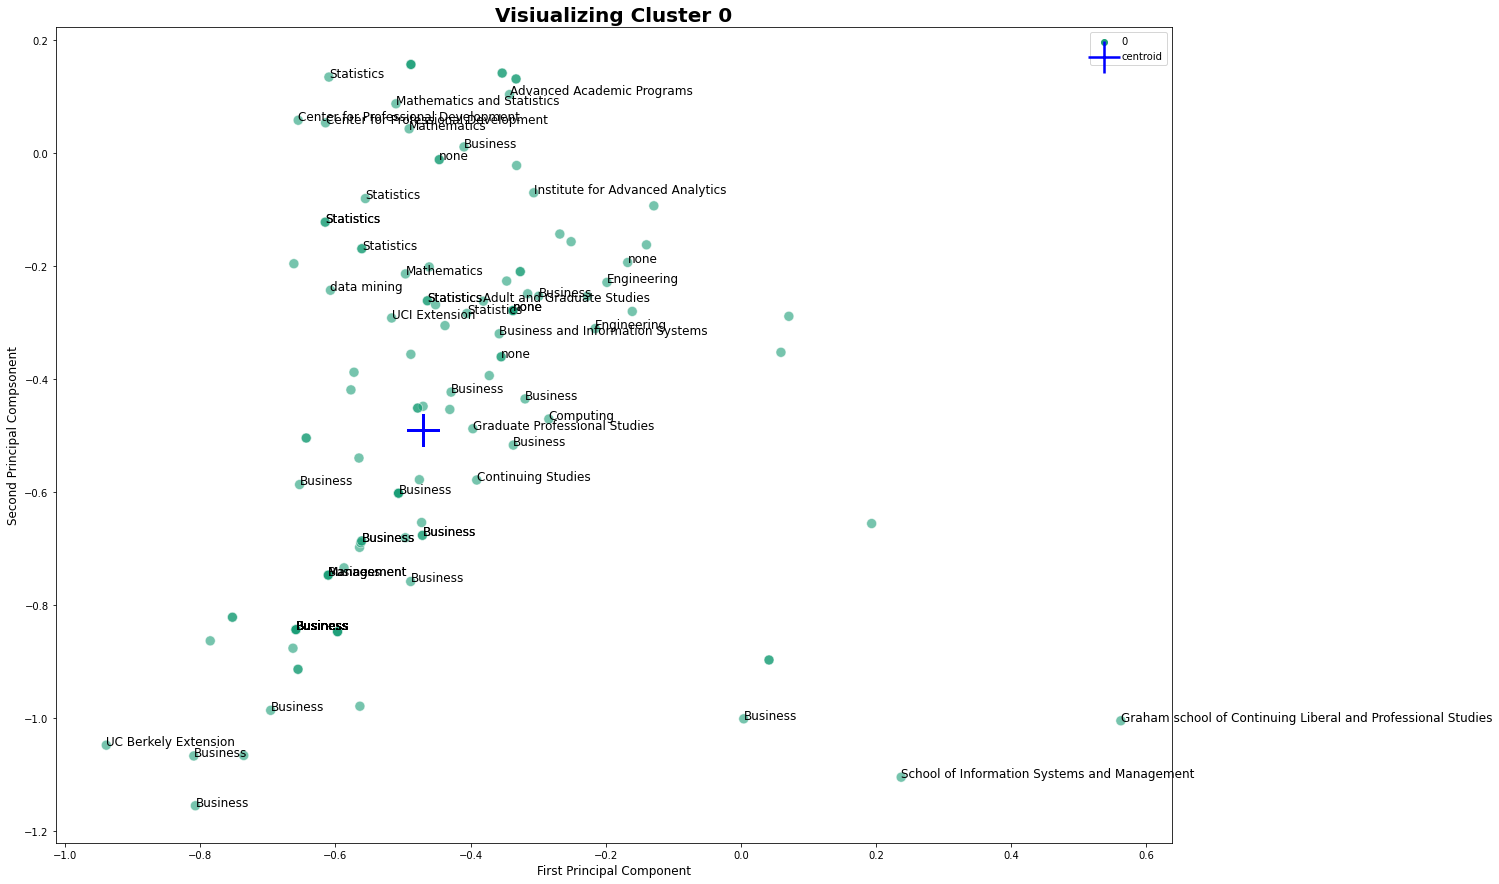

In [27]:
# visualizing cluster 0

cluster0 = pred_pd[pred_pd['KMeans']== 0]
plt.figure(figsize=(20,15))
plt.title('Visiualizing Cluster 0', fontsize=20, fontweight='bold' )
ax = sns.scatterplot(data=cluster0, x='PCA1', y='PCA2', s=100, hue='KMeans', palette='Dark2', alpha=0.6)
sns.scatterplot(data=cluster0, x='centeroid_x', y='centeroid_y', s=1000, color='blue', marker='+', label='centroid')
plt.xlabel('First Principal Component',fontsize=12)
plt.ylabel('Second Principal Compsonent',fontsize=12)
plt.legend()

# annotating only few clusters with department names
for index,row in cluster0.iterrows():
    ax.annotate((row['Dept']), (row['PCA1'], row['PCA2']), fontsize=12)
plt.show()

##### Grading Feedback Cell

Your explanation here

The department names of the universities that provide data science programs are used to label the 5 clusters. Below pattern could be noticed in each cluster:

* Business, risk management, and statistics are the most prevalent departments in cluster - 0. This department may provide courses in data science and analytics that are related to finance or business.

* Cluster - 1 would be relevant to data analytics in physics and astronomy since it only contains one department, the "school of physics, astronomy and computational sciences."

* All of the departments of data science and computer science's programs are in Cluster - 2.

* Information science and computer science departments are represented by Cluser - 3.

* Cluster - 4 is sandwiched between cluster - 0 (business analytics) and cluster - 2 (data science & computer science). As a result, a variety of labeling, including interdisciplinary, professional studies, informatics, computing science/statistics; combination of departments between statistics and data science could be seen in this cluster.


##### Grading Feedback Cell

# Question 7: (10 pts)
- Starting with pipe_pca1 from question 5, transform the pipeline and save the resulting dataframe to a variable named `pca_fun`.  
-Extract the output from the standard scaler output column from the first row of pca_fun and store in a variable named `row1_centered`. 
- Manually compute 5 PCA scores by projecting `row1_centered` onto the first 5 loading vectors which were computed in your PCA object. Save the 5 projected pca scores in a varialbe called `proj_scores`.  
- Extract the first 5 PCA scores from the first row of the pca_fun scores column and save them in a variable named `pca_fun_scores`.  
- The grading cell prints `proj_scores` and `pca_fun_scores` such that they are right next to each other.  Compare `proj_scores` to `pca_fun_scores` and explain why they are the same or different. 
- Indicate what specific ISLR equation you implemented in the explanation.  Identify the equation by it's equation number in the text book.
- Separate the requested 2 explanations by introducing bullets in the markdown cell.

In [28]:
pca_fun = pipe_pca1.transform(ds_features_df)

row1_centered = np.array(pca_fun.select('centered_tfidf').first()['centered_tfidf'])
loading_vectors = pipe_pca1.stages[-1].pc.toArray()

proj_scores = row1_centered.dot(loading_vectors[:,:5]) # loading vectors of first 5 principal components
pca_fun_scores = np.array(pca_fun.select('scores').first()['scores'])[:5] # 5 PCA scores from first row of the data

In [29]:
# Grading Cell - do not modify
print(proj_scores)
print(pca_fun_scores)

[-0.25965125  0.64705684 -0.82696998  1.44019201  0.01046991]
[-0.25965125  0.64705684 -0.82696998  1.44019201  0.01046991]


##### Grading Feedback Cell

Your 2 explanations here (4 pts): 

Centered data in the first row is multiplied by the loading vectors of the first 5 principal components to produce `proj_scores`. This outcome corresponds to the first five values in the first row of `pca_fun_scores`. 
The results would be same because the PCA score is a linear combination of loading vector and the orginal data (as shown in the below equation).

* $z_{i1} = φ_{11}x_{i1} + φ_{21}x_{i2} + ... + φ_{p1} x_{ip}$ has been used to compute `proj_scores` in the above code.

  where, $i=1:$ represents first row for the computation performed in the above code.
  
    $p=98:$ there are 98 features (words in the vocabulary)
* Equation 10.2 in the ISLR book.

##### Grading Feedback Cell

# Question 8: (10 pts)
- Perform an inverse transform on the `proj_scores` variable and store the result in a variable named `inverse`.  
- The grading cell below prints `inverse` and the original `row1_centered` data such that they are right next to each other.  
- Explain why `inverse` is the same or different than `row1_centered`.  
- If the `inverse` is different than `row1_centered`, explain how you could modify the forward and reverse transformation process such that the resulting `inverse` data almost exactly matches `row1_centered`.  Be very specific about how you would modify the process.
- Indicate what specific ISLR inverse equation you implemented in the explanation.  Identify the equation by it's equation number in the text book.
- Separate the requested 3 explanations by introducing bullets in the markdown cell.

In [30]:
inverse = np.dot(proj_scores , loading_vectors[:,:5].T)

In [31]:
# Grading Feedback Cell Do Not Modify
print(row1_centered)
print(inverse)

[ 0.05718022  0.29830615 -0.50016423 -0.36213126  0.83029452 -0.24098572
  2.16160568 -0.23897148 -0.23897148 -0.21909331 -0.20638446 -0.20869933
 -0.19968104 -0.19710492 -0.17021487 -0.17923925 -0.16209679 -0.14479692
 -0.15905144 -0.14479692 -0.13984625 -0.135553   -0.135553   -0.14459222
 -0.10492843 -0.10492843 -0.10492843 -0.09354761 -0.09771385 -0.08142821
  3.5339841  -0.08142821 -0.06842764 -0.06842764 -0.06842764 -0.05433618
 -0.05433618 -0.05433618 -0.05433618 -0.03881585 -0.03881585 -0.03881585
 -0.03881585 -0.03881585 -0.03881585 -0.03881585 -0.03881585 -0.03881585
 -0.03881585 -0.03881585 -0.03881585 -0.03881585 -0.03881585 -0.03881585
 -0.04246869 -0.03881585 -0.02123435 -0.02123435 -0.02123435 -0.02123435
 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435
 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435
 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0.02123435
 -0.02123435 -0.02123435 -0.02123435 -0.02123435 -0

##### Grading Feedback Cell

Your 3 explanations here (6 pts):

* `inverse` differs from `row1_centered` because we are doing an inverse transformation using only the first 5 principal components. Therefore, just a portion of the data's variance would be restored.

* In order to match `inverse` data almost exactly with `row1_centered`, we need to have `proj_scores` of all the principal components (in this instance 98 to be precise). To get all the scores, we should be multiplying loading vectors of all the principal components with `row1_centered`. And while doing the inverse, we would need to do inverse trasnformation using transposed loading vector of all the principal components.  

* The inverse implemented in the above code using the transpose of Θ in ISLR Eq 10.5

$$ x_{ij} ≈ \sum^M_{m=1}z_{im}φ_{jm}$$

##### Grading Feedback Cell